In [2]:
import os
os.environ['PATH'] += ':/Library/TeX/texbin'
import math

In [3]:
import sys
sys.path.append('../include')
import statsmodels
from sliding_window import sliding_window_detection

%load_ext autoreload
%autoreload 2

%run ../include/preamble.py
%run ../include/detection_test.py

# Detection test based on the zeros of the Kravchuk spectrogram

Hypothesis testing followes a Monte Carlo envelope methodology in order to discriminate between
- the null hypothesis $\textbf{H}_0$, ``the observations consist in pure noise"
$$
\boldsymbol{y} = \boldsymbol{\xi}
$$
- the alternative $\textbf{H}_1$, ``the data contain a deterministic signal of interest".
$$
\boldsymbol{y} =\mathsf{snr} \times \boldsymbol{x} + \boldsymbol{\xi}
$$
with $\mathsf{snr}>0$.


# Generate a synthetic signal

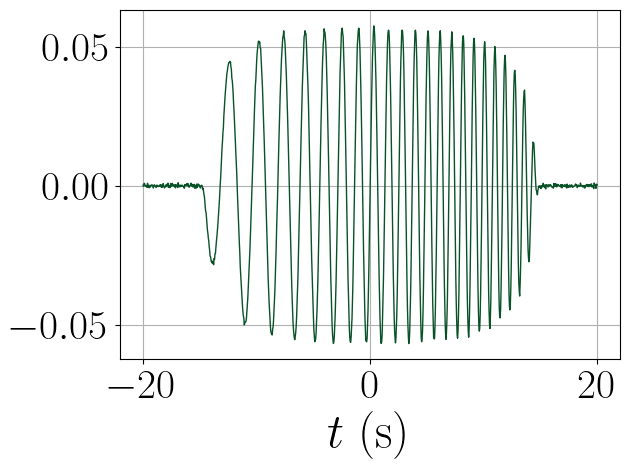

In [4]:
# number of points
N        = 1024

# bound of the observation window
observe  = 20

# duration of the chirp
duration = 15

# signal-to-noise ratio
snr      = 50

# generate a synthetic signal corrupted by complex white Gaussian noise
nsignal, time_t = the_noisy_chirp(N,snr,observe,duration)

# display the real part of the signal
_ = display_signal(nsignal,time_t)

# Perform the test

1. Generate $m$ samples of complex white Gaussian noise and compute
- their Kravchuk spectrogram and its zeros,
- their standard spectrogram and its zeros,
- the $K$ and $F$ functional statistics of the two point processes.

2. Compute the Kravchuk and standard spectrograms of the analyzed signal and their zeros.

3. Compute the $K$ and $F$ functional statistics of the zeros of the signal spectrograms.
4. Deduce the summary statistics.
5. Perform the test.

In [5]:
# desired minimal significance of the test (if not specified set to 0.05 by the function 'noise_samples')
alpha = 0.02 # FIXME 0.05 originally

# number of samples (if not specified set to 199 by the function 'noise_samples')
m = 199 # FIXME 原来是199

print(f"The value of m is: {m}")

# generate the complex white noise samples and store them in '../folder'
# alpha, m, folder = noise_samples(N,m=m, time_t=time_t,folder = 'samples')
folder = 'samples'

# perform the detection test
# the_test(nsignal,alpha,m,folder)

The value of m is: 199


# load BirdVox-70k dataset and perform the test

from https://zenodo.org/record/1226427#.YrW0fexByWA

Length of keys before filtering: 5852
Length of keys after filtering: 2926
Length of keys after filtering: 2926
New signal length: 1025


12000

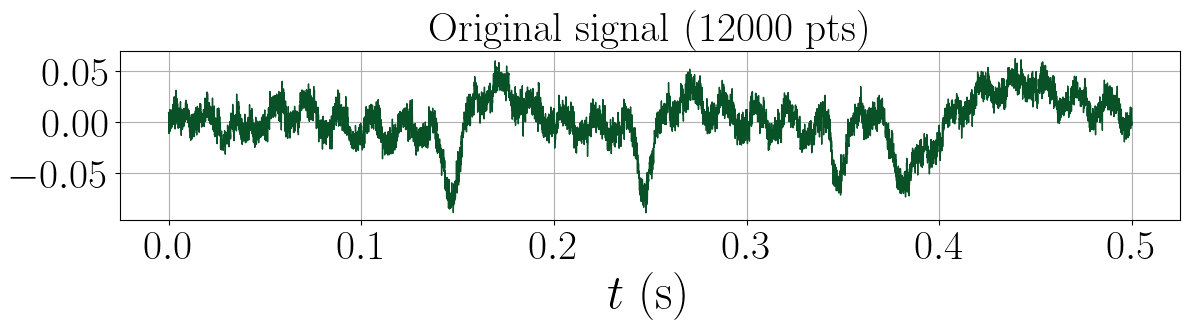

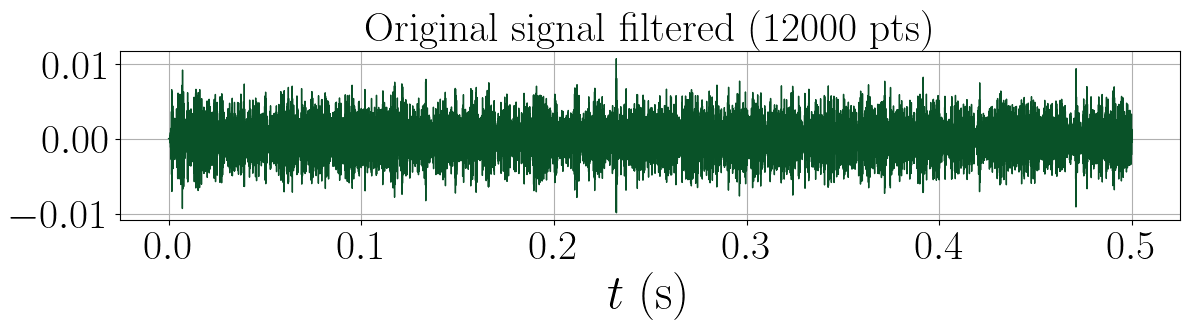

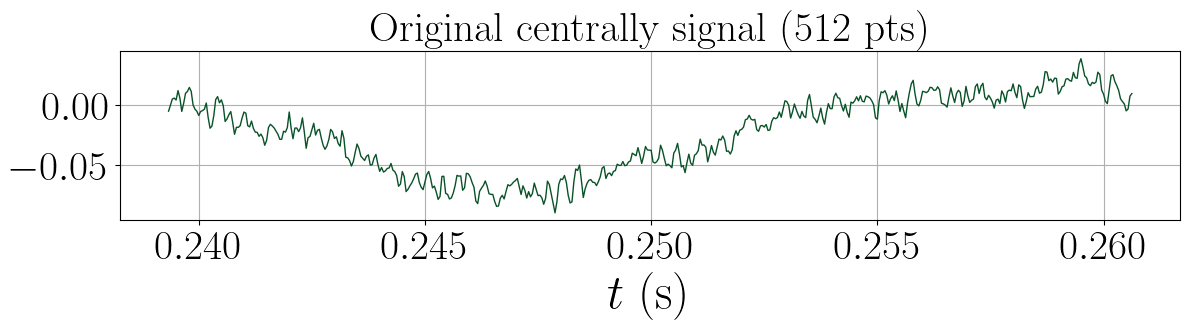

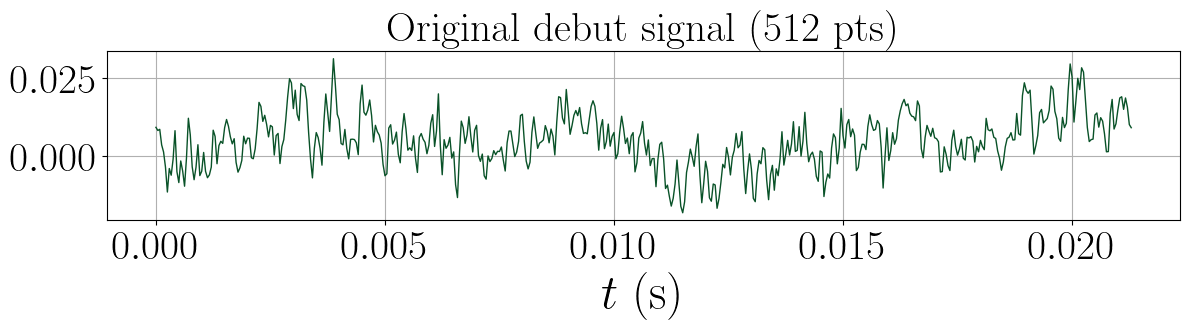

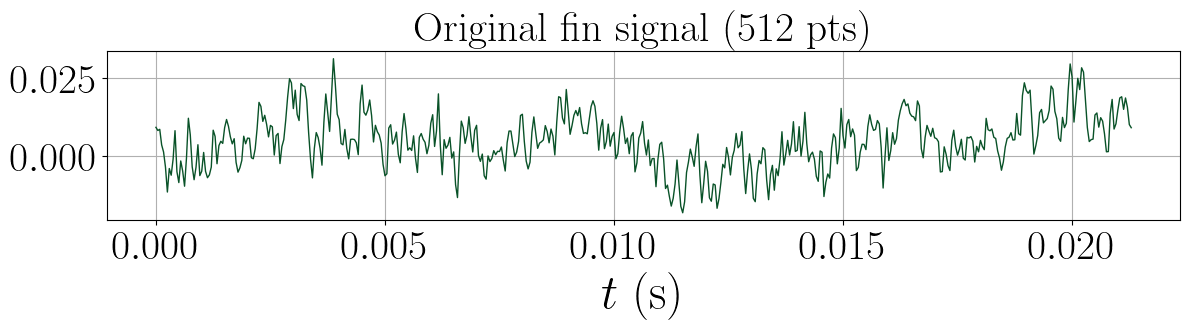

In [ ]:
import numpy as np
inf = np.inf

import h5py
import librosa
import librosa.display
import scipy.signal


# charger les données du capteur 1
data = h5py.File('../data/BirdVox-70k_unit01.hdf5')

# fréquence d'échantillonnage
sr   = 24000

keys = data['waveforms'].keys()

print(f"Length of keys before filtering: {len(keys)}")

# filtrer les clés se terminant par '1'
keys_positive = list(filter(lambda key: key.endswith('1'), keys))

# filtrer les clés se terminant par '0'
keys_negative = list(filter(lambda key: key.endswith('0'), keys))


print(f"Length of keys after filtering: {len(keys_positive)}")
print(f"Length of keys after filtering: {len(keys_negative)}")

key     = keys_positive[1786]
x       = data['waveforms'][key][()]  # Il s'agit simplement du 61e échantillon positif (clip de 0,5 seconde)
# La variable x est un tableau NumPy unidimensionnel de longueur 12000
time_t  = librosa.samples_to_time(range(len(x)), sr=sr)

# filtrer le signal pour supprimer les fréquences non pertinentes
b, a = scipy.signal.butter(N=15, Wn=(5000, 8000), btype='bandpass', fs=sr)
y    = scipy.signal.lfilter(b, a, x)
# Le tableau a exactement la même longueur que x (par exemple 12000 échantillons)
# y représente le signal temporel après filtrage


x_central = x[5744:6256]  # Remarque : en Python, les tranches sont à gauche fermées et à droite ouvertes, donc 5744 à 6255 = 512 points
time_central = time_t[5744:6256]

x_debut = x[0:512]  # Remarque : tranche de 0 à 511, soit 512 points
time_debut = time_t[0:512]

x_fin = x[11488:12000]  # Remarque : tranche de 11488 à 11999, soit 512 points
time_fin = time_t[11488:12000]


print(f"New signal length: {len(nsignal)}")  # Devrait être 1200



# Deuxième figure : signal filtré original
plt.figure(figsize=(12, 3))
_ = display_signal(x, time_t)
plt.title("Original signal (12000 pts)")

plt.figure(figsize=(12, 3))
_ = display_signal(y, time_t)
plt.title("Original signal filtered (12000 pts)")

plt.figure(figsize=(12, 3))
_ = display_signal(x_central, time_central)
plt.title("Original centrally signal (512 pts)")

plt.figure(figsize=(12, 3))
_ = display_signal(x_debut, time_debut)
plt.title("Original debut signal (512 pts)")

plt.figure(figsize=(12, 3))
_ = display_signal(x_debut, time_debut)
plt.title("Original fin signal (512 pts)")
len(x)


zt (zeros of time-domain signal): [0.0818451  0.0818451  0.17628175 0.17628175 0.20776064 0.20776064
 0.2455353  0.29590151 0.29590151 0.31478884 0.31478884 0.32108462
 0.32108462 0.3525635  0.3525635  0.38404239 0.38404239 0.39663394
 0.39663394 0.42811283 0.42811283 0.44700016 0.44700016 0.44700016
 0.44700016 0.48477482 0.48477482 0.49736637 0.49736637 0.5162537
 0.5162537  0.5162537  0.5162537  0.53514103 0.53514103 0.56661992
 0.56661992 0.57291569 0.57291569 0.57921147 0.57921147 0.61069036
 0.61069036 0.62957769 0.62957769 0.64846502 0.64846502 0.65476079
 0.65476079 0.66735235 0.66735235 0.66735235 0.66735235 0.67364812
 0.67364812 0.68623968 0.68623968 0.71142279 0.71142279 0.73660589
 0.73660589 0.74290167 0.74290167 0.74919745 0.74919745 0.74919745
 0.78697211 0.78697211 0.79326788 0.79326788 0.81215522 0.81215522
 0.81215522 0.81215522 0.81845099 0.81845099 0.83104255 0.83104255
 0.83104255 0.83104255 0.84992988 0.84992988 0.84992988 0.84992988
 0.85622565 0.85622565 0.8625

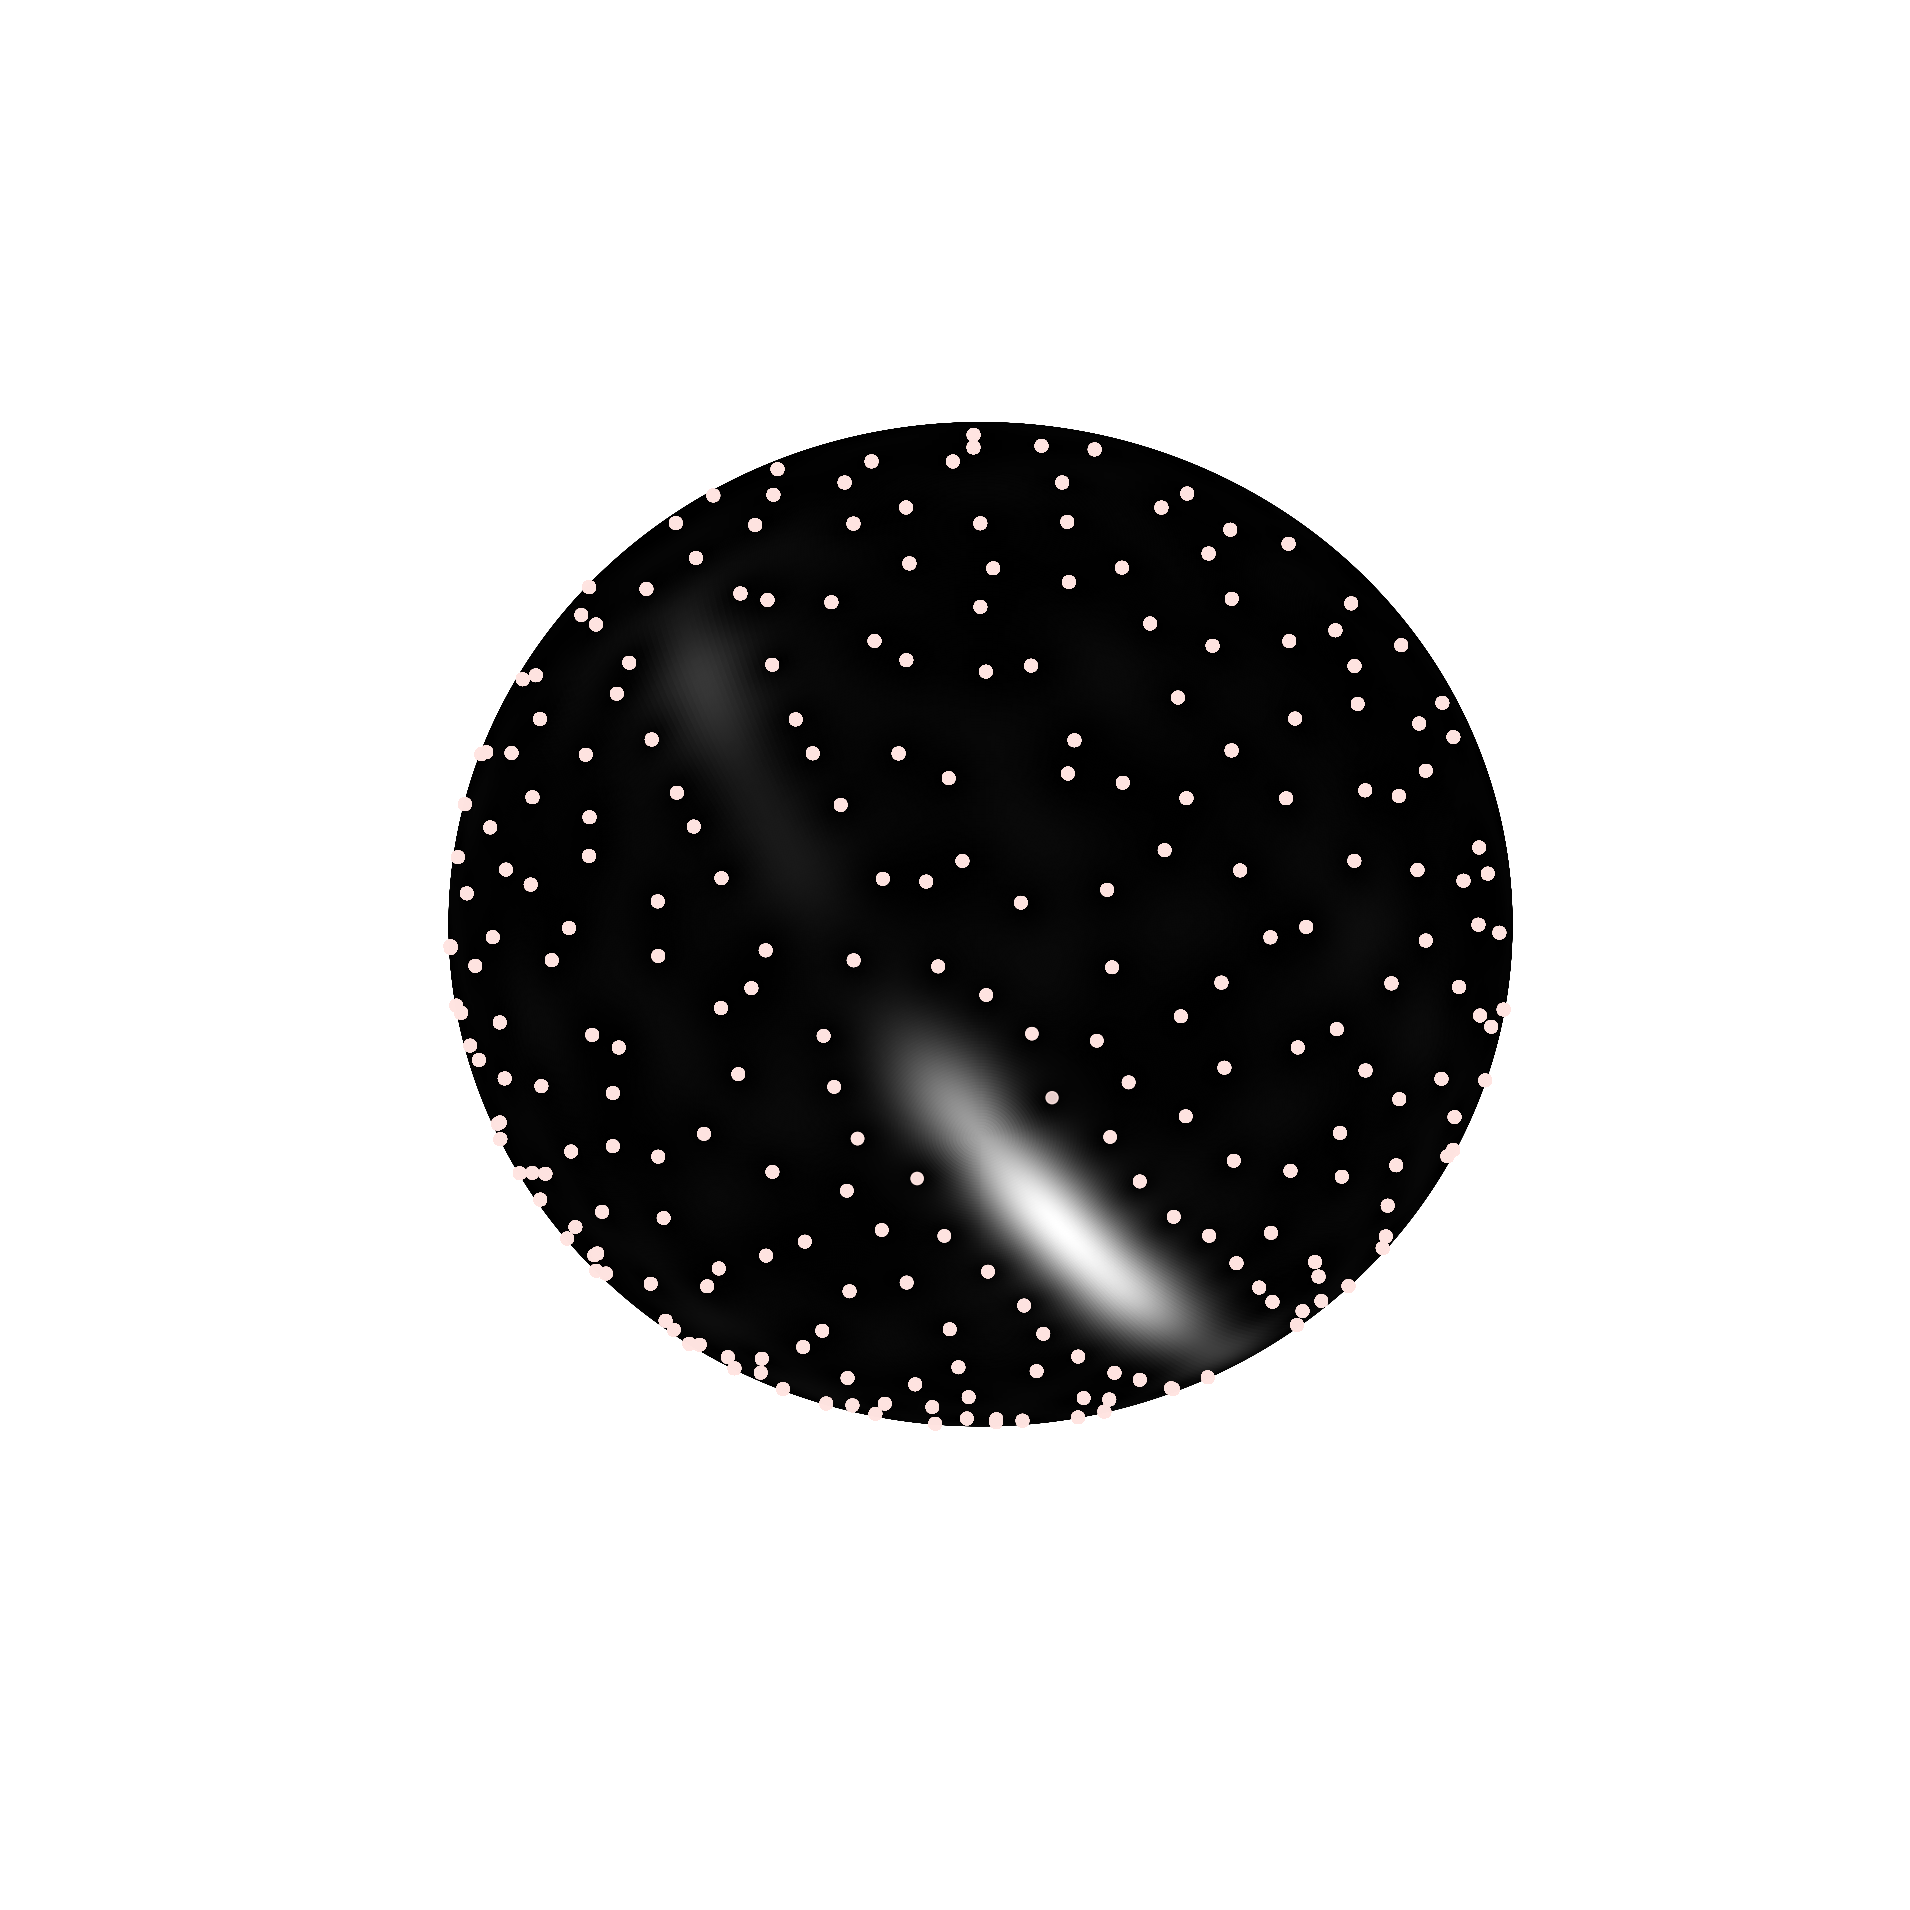

In [7]:
# compute the transform autour du point central
Ks     = the_transform(x_central)

# find the zeros
zt, zp = the_zeros(Ks,N)
print("zt (zeros of time-domain signal):", zt)
print("zp (zeros of transform domain):", zp)

# display the Kravchuk spectrogram and its zeros on the sphere
spherical_display(Ks,zt,zp)

zt (zeros of time-domain signal): [0.08814088 0.08814088 0.13221131 0.13221131 0.22035219 0.22035219
 0.23294374 0.25183107 0.25183107 0.27071841 0.27071841 0.28330996
 0.28330996 0.34626773 0.34626773 0.3525635  0.3525635  0.3525635
 0.39663394 0.39663394 0.44070438 0.44070438 0.44070438 0.44070438
 0.44700016 0.45329593 0.45329593 0.47218326 0.47218326 0.47218326
 0.47218326 0.50995793 0.50995793 0.52254948 0.52254948 0.55402836
 0.55402836 0.56661992 0.56661992 0.56661992 0.56661992 0.58550725
 0.58550725 0.59180303 0.60439458 0.60439458 0.63587346 0.63587346
 0.63587346 0.63587346 0.64216924 0.64216924 0.64846502 0.64846502
 0.67364812 0.67364812 0.69253545 0.69883123 0.69883123 0.70512701
 0.70512701 0.70512701 0.70512701 0.73660589 0.73660589 0.761789
 0.761789   0.78067633 0.78067633 0.78067633 0.78067633 0.79956366
 0.79956366 0.81845099 0.81845099 0.81845099 0.81845099 0.82474677
 0.82474677 0.83104255 0.83104255 0.83733832 0.83733832 0.8436341
 0.8436341  0.85622565 0.8562256

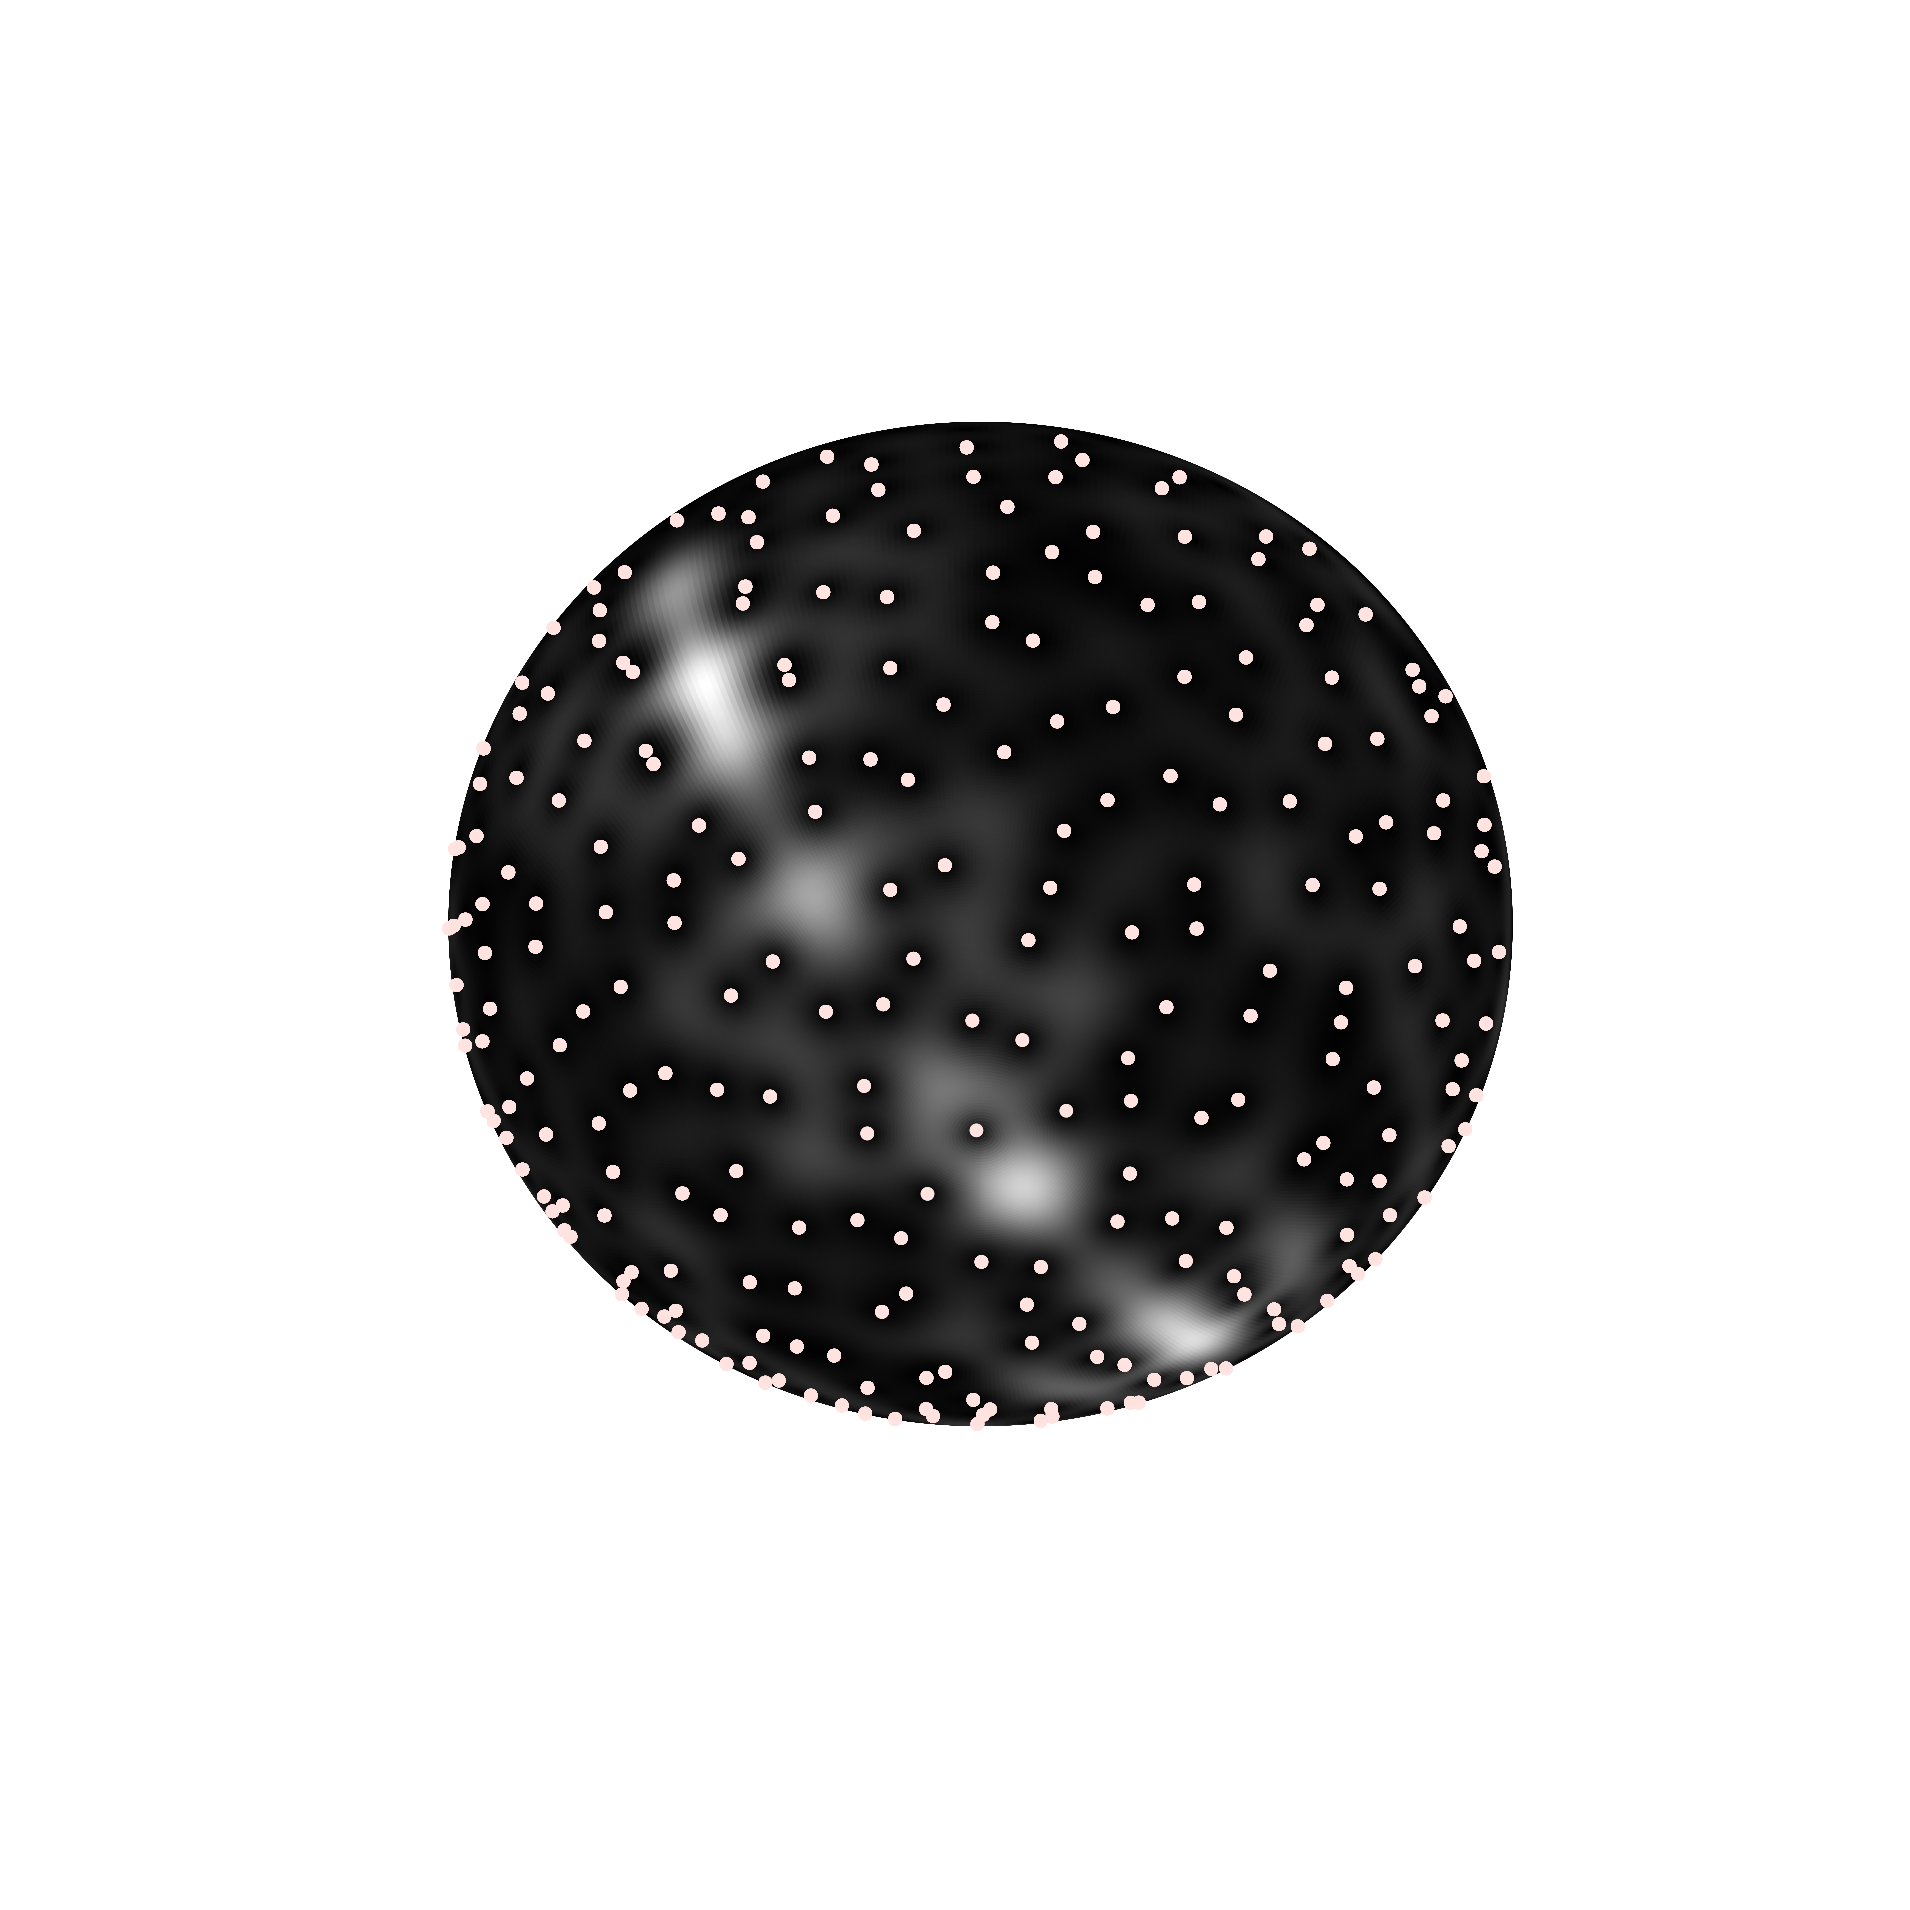

In [8]:
# compute the transform autour du point du début de clip
Ks     = the_transform(x_debut)

# find the zeros
zt, zp = the_zeros(Ks,N)
print("zt (zeros of time-domain signal):", zt)
print("zp (zeros of transform domain):", zp)

# display the Kravchuk spectrogram and its zeros on the sphere
spherical_display(Ks,zt,zp)

zt (zeros of time-domain signal): [0.11332398 0.11332398 0.15739442 0.16998598 0.16998598 0.26442263
 0.26442263 0.27071841 0.30849307 0.30849307 0.3273804  0.3273804
 0.33367617 0.33367617 0.37145083 0.37145083 0.40292972 0.40292972
 0.40292972 0.40292972 0.41552127 0.41552127 0.41552127 0.41552127
 0.4344086  0.4344086  0.44070438 0.44070438 0.50995793 0.50995793
 0.53514103 0.53514103 0.55402836 0.55402836 0.55402836 0.55402836
 0.56032414 0.56032414 0.59180303 0.59180303 0.5980988  0.5980988
 0.61069036 0.61069036 0.61069036 0.61698613 0.61698613 0.64216924
 0.64216924 0.65476079 0.65476079 0.6799439  0.6799439  0.68623968
 0.68623968 0.69253545 0.69253545 0.69253545 0.69253545 0.71142279
 0.71142279 0.71142279 0.71142279 0.73660589 0.73660589 0.73660589
 0.73660589 0.761789   0.761789   0.79326788 0.79956366 0.79956366
 0.81215522 0.81215522 0.82474677 0.82474677 0.82474677 0.82474677
 0.83733832 0.83733832 0.83733832 0.83733832 0.8436341  0.8436341
 0.84992988 0.84992988 0.856225

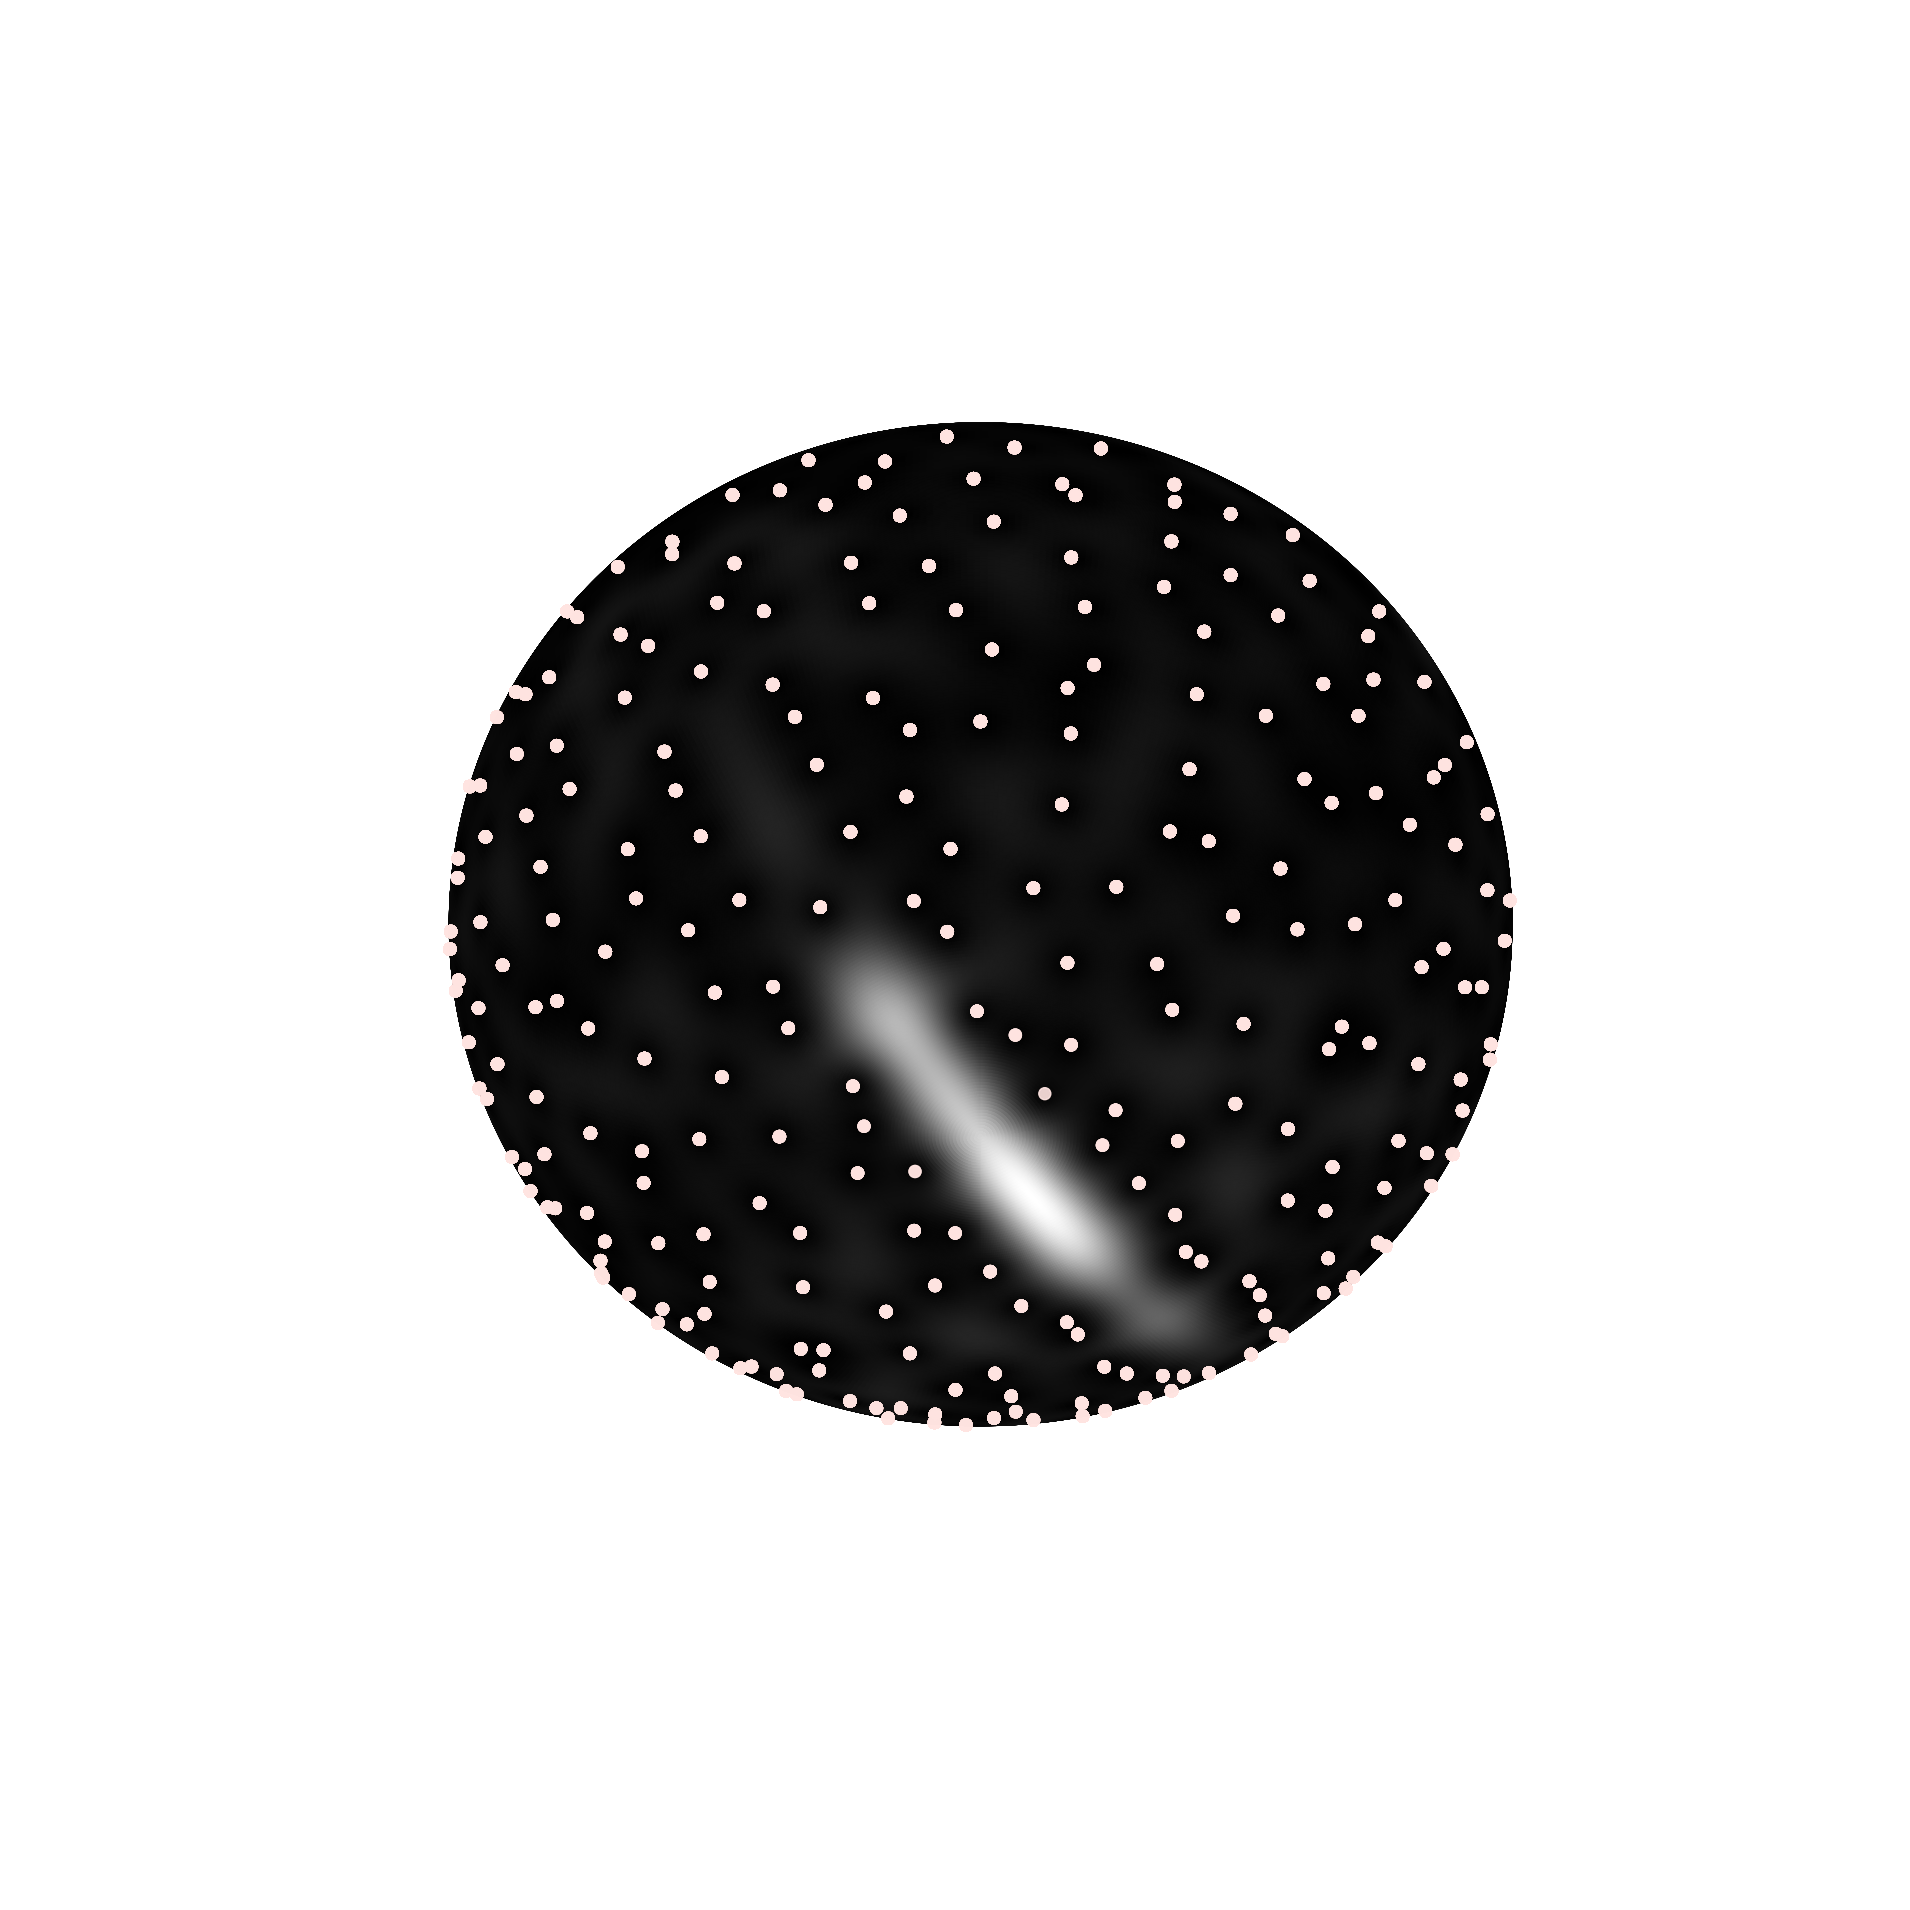

In [11]:
# compute the transform autour du point fin
Ks     = the_transform(x_fin)

# find the zeros
zt, zp = the_zeros(Ks,N)
print("zt (zeros of time-domain signal):", zt)
print("zp (zeros of transform domain):", zp)

# display the Kravchuk spectrogram and its zeros on the sphere
spherical_display(Ks,zt,zp)

In [ ]:
# Effectuer le test

# niveau de signification minimal souhaité pour le test (si non spécifié, la fonction 'noise_samples' utilise 0.5 par défaut)
alpha = 0.02  # FIXME alpha = 0.05

# nombre d’échantillons (si non spécifié, la fonction utilise 199 par défaut)
m = 199  # FIXME valeur initiale = 199

print(f"The value of m is: {m}")
print(f"The value of alpha is: {alpha}")

data = h5py.File('../data/BirdVox-70k_unit01.hdf5')
keys = data['waveforms'].keys()

keys_negative = list(filter(lambda key: key.endswith('0'), keys))

print(f"The value of N is: {N}")

time_t = librosa.samples_to_time(range(N), sr=sr)

print(f"The length of time_t: {len(time_t)}")

print(f"The value of sr is: {sr}")

# générer les échantillons de bruit blanc complexe et les enregistrer dans le dossier '../folder'
# alpha, m, folder = noise_samples(N=512, m=m, time_t=time_t, folder='samples')

# générer les échantillons à partir des vraies classes négatives
# alpha, m, folder = noise_samples_from_real_negatives(
#     h5_path='../data/BirdVox-70k_unit01.hdf5',
#     keys_negative=keys_negative,
#     N=256,
#     m=199,
#     time_t=np.arange(257),  # en accord avec ton STFT
#     folder='samples'
# )

folder = 'samples'

# exécuter le test de détection
# the_test(nsignal, alpha, m, folder)


The value of m is: 199
The value of alpha is: 0.02
The value of N is: 1024
The length of time_t: 1024
The value of sr is: 24000


In [ ]:
# results = sliding_window_detection(
#     x, time_t,
#     window_size=512,
#     step_size=256,
#     alpha=0.05,
#     m=199,
#     folder='samples',
#     functional='K'
# )

# # Supposons que detection_results soit la valeur retournée par sliding_window_detection
# predictions = [res["prediction"] for res in results]
# avg_score = np.mean(predictions)

# # Définir le seuil de décision
# decision_threshold = 0.5
# final_prediction = int(avg_score > decision_threshold)

# print(f"\n--- Décision finale ---")
# print(f"Score moyen par fenêtre : {avg_score:.2f}")
# print(f"Prédiction finale (seuil = {decision_threshold}) : {'Appel d’oiseau (1)' if final_prediction else 'Bruit (0)'}")


In [9]:
alpha = 0.05
m = 199
folder = 'samples'

In [ ]:
import random
import math

random.seed(66)  # Optionnel : fixer la graine aléatoire pour la reproductibilité

window_taille = 1024
step_taille = window_taille // 2  # Division entière

num_keys_positive = len(keys_positive)
num_keys_negative = len(keys_negative)

nbr = 100
step_pos = max(1, math.floor(num_keys_positive / nbr))  # Choisissez ce nombre comme vous voulez : cela détermine combien de signaux seront testés
step_neg = max(1, math.floor(num_keys_negative / nbr))

print(f"Total keys pos: {num_keys_positive}, Step pos size: {step_pos}")
print(f"Total keys neg: {num_keys_negative}, Step neg size: {step_neg}")
print("\n")

num = 0  # Réinitialiser le compteur

for i in range(0, num_keys_positive, step_pos):
    key = random.choice(keys_positive[i:i + step_pos])
    num += 1
    suffix = "th" if 11 <= num % 100 <= 13 else {1: "st", 2: "nd", 3: "rd"}.get(num % 10, "th")
    print(f"the {num}{suffix} key_positive: {key}\n")

    x = data['waveforms'][key][()]
    time_t = librosa.samples_to_time(range(len(x)), sr=sr)

    results = sliding_window_detection(
        y=x,  # Ici, utilisez x pour le signal brut de 0,5 seconde ; utilisez y pour le signal filtré
        time_t=time_t,
        window_size=window_taille,
        step_size=step_taille,
        sr=sr,
        alpha=alpha,
        m=m,
        folder=folder,
        functional='K'
    )
    

num = 0  # Réinitialiser le compteur

for i in range(0, num_keys_negative, step_neg):
    key = random.choice(keys_negative[i:i + step_neg])
    num += 1
    suffix = "th" if 11 <= num % 100 <= 13 else {1: "st", 2: "nd", 3: "rd"}.get(num % 10, "th")
    print(f"the {num}{suffix} key_negative: {key}\n")

    x = data['waveforms'][key][()]
    time_t = librosa.samples_to_time(range(len(x)), sr=sr)

    results = sliding_window_detection(
        y=x,
        time_t=time_t,
        window_size=window_taille,
        step_size=step_taille,
        sr=sr,
        alpha=alpha,
        m=m,
        folder=folder,
        functional='K'
    )


Total keys pos: 2926, Step pos size: 29
Total keys neg: 2926, Step neg size: 29


the 1st key_positive: unit01_024393335_06805_1

 Detecting window 1: [4976:6000]
